# Wrangle and Analyze Data

## Introduction 

In this project I will be wrangling and analyzing the tweet archive of Twitter user <a href='https://twitter.com/dog_rates'>@dog_rates</a>, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because <a href='https://knowyourmeme.com/memes/theyre-good-dogs-brent'> "they're good dogs Brent."</a> WeRateDogs has over 4 million followers and has received international media coverage. 
<br><br>
In addition to the Twitter archive file, two pieces of data needs to be gathered:
- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically.
- Each tweet's retweet count and favorite ("like") count at minimum, and any additional interesting data via Twitter's API.

## Table of contents

- <a href='#DW'>Data Wrangling.</a>
  1. <a href='#G'>Gather.</a>
  2. <a href='#A'>Assess.</a>
  3. <a href='#C'>Clean.</a>
  4. <a href='#S'>Storing.</a>
<br><br>
- <a href='#AV'>Analyzing, and Visualizing Data.</a>
  1. <a href='#TN'>Total Number of Tweets.</a>
  2. <a href='#RF'>Retweets and Favourites.</a>
  3. <a href='#MR'>Most Rated Dog Breeds.</a>

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import requests
import json
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image, display, HTML

%matplotlib inline

pd.options.display.max_colwidth = 200

<hr>

## Data Wrangling <a id='DW'></a>

### Gather <a id='G'></a>

#### 1- The WeRateDogs Enhanced Twitter Archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 2- The Tweet Image Predictions

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = url.split('/')[-1]
response = requests.get(url)
with open(file_name, mode='wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv(file_name, sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3- Additional Data via the Twitter API

Code was copied form Udacity, and executed once to get the additional data via Twitter's API.

In [5]:
# import tweepy
# from tweepy import OAuthHandler
# from timeit import default_timer as timer

## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
## These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'X'
# consumer_secret = 'X'
# access_token = 'X'
# access_secret = 'X'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

## Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive.tweet_id.values
# len(tweet_ids)

## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
    ## This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
# list of dictionaries 
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)
                       })
        
# convert the list of dictionaries (df_list) to a pandas DataFrame
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id','retweet_count', 'favorite_count'])

In [7]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7641,35948
1,892177421306343426,5647,31029
2,891815181378084864,3745,23347
3,891689557279858688,7811,39243
4,891327558926688256,8405,37494


<hr>

### Assess <a id='A'></a>

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [9]:
# random sample 
twitter_archive.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2217,668528771708952576,NaN,NaN,2015-11-22 20:37:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gòrdón. He enjoys his razberrita by pool. Not a care in the world. 12/10 this dog has a better life than me https://t.co/zpdBQCcYgW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668528771708952576/photo/1,12,10,Gòrdón,None,None,None,None
2270,667502640335572993,NaN,NaN,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11,10,Hall,None,None,None,None
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1604,685906723014619143,NaN,NaN,2016-01-09 19:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Olive. He's stuck in a sleeve. 9/10 damn it Olive https://t.co/NnLjg6BgyF,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/685906723014619143/photo/1,https://twitter.com/dog_rates/status/685906723014619143/photo/1",9,10,Olive,None,None,None,None
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Some happy pupper news to share. 10/10 for everyone involved \nhttps://t.co/MefMAZX2uv,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/200-dogs-saved-from-south-korean-dog-meat-industry-001385441.html?sbdht=_pM1QUzk3wsfscF9XF2WEd9KoWDpsQlMUjfh1HxxUq0u5mMbiu2B0kw2_,10,10,None,None,None,pupper,None
512,811744202451197953,NaN,NaN,2016-12-22 01:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Halo. She likes watermelon. 13/10 https://t.co/TZkiQZqwA6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811744202451197953/photo/1,13,10,Halo,None,None,None,None
1391,700143752053182464,NaN,NaN,2016-02-18 02:24:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https://t.co/Fbdr5orUrJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700143752053182464/photo/1,10,10,None,None,None,pupper,None
1275,709179584944730112,NaN,NaN,2016-03-14 00:49:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Sammy. He's in a tree. Very excited about it. 13/10 https://t.co/CLe9ETEjeF,NaN,NaN,NaN,https://vine.co/v/iwAjdlEjwMl,13,10,Sammy,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# check if there are tweets with a decimal rating numerator 
twitter_archive[twitter_archive.text.str.contains(r"\d+\.\d+/\d+")][['text', 'rating_numerator']]

,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [13]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
# check for duplicated rows
sum(twitter_archive.duplicated())

0

In [15]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7641,35948
1,892177421306343426,5647,31029
2,891815181378084864,3745,23347
3,891689557279858688,7811,39243
4,891327558926688256,8405,37494
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,130,270
2328,666033412701032449,41,111
2329,666029285002620928,42,120


In [16]:
# random sample 
tweet_json.sample(8)

,tweet_id,retweet_count,favorite_count
371,826598799820865537,252,5136
1736,678675843183484930,1425,2806
1087,733482008106668032,938,3096
1946,673270968295534593,346,1032
1975,672488522314567680,412,1063
2141,669363888236994561,215,596
125,867072653475098625,110,0
652,789986466051088384,2344,9387


In [17]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [18]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2680.954097,7510.450879
std,6.823170e+16,4533.479822,11659.205319
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,543.000000,1308.500000
50%,7.182469e+17,1256.000000,3267.000000
75%,7.986692e+17,3115.000000,9195.000000
max,8.924206e+17,77092.000000,155119.000000


In [19]:
# check for duplicated rows
sum(tweet_json.duplicated())

0

In [20]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
# random sample 
image_predictions.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
1654,810254108431155201,https://pbs.twimg.com/media/Cz6Z0DgWIAAfdvp.jpg,1,Staffordshire_bullterrier,0.292556,True,American_Staffordshire_terrier,0.261233,True,Border_terrier,0.062375,True
1670,813081950185472002,https://pbs.twimg.com/media/C0ilsa1XUAEHK_k.jpg,2,Doberman,0.909951,True,kelpie,0.042649,True,miniature_pinscher,0.023004,True
1496,783391753726550016,https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg,4,Norwegian_elkhound,0.877130,True,cairn,0.086241,True,keeshond,0.011019,True
1452,776813020089548800,https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg,1,toy_poodle,0.516610,True,miniature_poodle,0.255033,True,standard_poodle,0.168989,True
991,708026248782585858,https://pbs.twimg.com/ext_tw_video_thumb/708026062568087553/pu/img/rNhylAwIfb6YthGu.jpg,1,malinois,0.786468,True,Chesapeake_Bay_retriever,0.068979,True,Siamese_cat,0.029304,False
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,0.078205,True
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
# check if there are images that weren't predicted as dogs (in all 3 predictions)
image_predictions.query('~p1_dog & ~p2_dog & ~p3_dog')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [25]:
# check for duplicated rows
sum(image_predictions.duplicated())

0

#### Quality

`twitter_archive`
- 78 replies. 
- 181 retweets. 
- Nulls represented as "None" in (*doggo, floofer, pupper,* and *puppo* columns). 
- Some dogs have more than one stage. 
- Some dogs don't have a stage. **[will not be cleaned]**
- Some tweets have more than one fraction resulting in storing wrong rating. 
- Some tweets rate more than one dog. **[partially cleaned]**
- Some rating numerators are decimal numbers, but stored wrong in *rating_numerator* column. 
- *rating_numerator* column data type should be float. 
- Some tweets have a *rating_denominator* other than 10. 
- *timestamp* column data type should be datetime.
<br><br>

`image_predictions`
- Missing records (2075 instead of 2356). **[will not be cleaned]**
- Some tweets rate other animals. **[partially cleaned]**
- Some dogs weren't predicted as dogs. **[will not be cleaned]**
<br><br>

`tweet_json`
- Missing records (2331 instead of 2356) 'deleted tweets'. **[partially cleaned]**

#### Tidiness
- `twitter_archive` dog stages should be in one column (*doggo, floofer, pupper, puppo*) of type category.
- `twitter_archive` and `tweet_json` should be 1 dataframe. 
- *jpg_url* and a prediction (only if it's a prediction of a dog) with it's confidence from `image_predictions` should be in `twitter_archive`.

#### Not needed columns
`twitter_archive`
- *source*, *expanded_urls*, *name*. 
- columns related to replies and retweets after cleaning them. 
- *rating_denominator* column after cleaning it (all 10s).

<hr>

### Clean <a id='C'></a>

In [26]:
# make a copy of each piece of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [27]:
def drop_tweets(tweet_ids_to_drop, twitter_archive_clean, image_predictions_clean):
    """drops the tweets with a tweet_id in (tweet_ids_to_drop)"""
    # drop the tweets with a tweet_id in (tweet_ids_to_drop) from twitter_archive_clean
    twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(tweet_ids_to_drop)]
    # drop the tweets with a tweet_id in (tweet_ids_to_drop) from image_predictions_clean
    image_predictions_clean = image_predictions_clean[~image_predictions_clean.tweet_id.isin(tweet_ids_to_drop)]
    return twitter_archive_clean, image_predictions_clean

<hr>

**`tweet_json`: Missing records (2331 instead of 2356) 'deleted tweets'.**

##### Define

Get some of the missing records from *tweet_json.txt* file in Udacity, since some deleted tweets were available before.

##### Code

In [28]:
# list of dictionaries 
df_list = []

with open('tweet_json_udacity.txt') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)
                       })
        
# convert the list of dictionaries (df_list) to a pandas DataFrame
tweet_json_udacity = pd.DataFrame(df_list, columns = ['tweet_id','retweet_count', 'favorite_count'])

In [29]:
# all tweet ids in tweet_json_clean
tweet_json_ids = tweet_json_clean.tweet_id.values
# records in tweet_json_udacity with a tweet_id not in tweet_json_clean 
missing_records = tweet_json_udacity[~tweet_json_udacity.tweet_id.isin(tweet_json_ids)]
# append the missing records to tweet_json_clean
tweet_json_clean = tweet_json_clean.append(missing_records, ignore_index=True)

##### Test

In [30]:
# check the number of records (rows)
tweet_json_clean.shape

(2354, 3)

In [31]:
# number of duplicated tweet ids (should be 0)
sum(tweet_json_clean.tweet_id.duplicated())

0

<hr>

**`twitter_archive`: 78 replies.**

##### Define

Drop the replies.

##### Code

In [32]:
# get replies tweet ids
tweet_ids_to_drop = twitter_archive_clean[~twitter_archive_clean.in_reply_to_status_id.isna()].tweet_id.values
# drop the tweets from twitter_archive_clean and image_predictions_clean
twitter_archive_clean, image_predictions_clean = drop_tweets(tweet_ids_to_drop, twitter_archive_clean, image_predictions_clean)

##### Test

In [33]:
# there should be 0 non-null values in (in_reply_to_status_id) -> 0 replies
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

In [34]:
image_predictions_clean.shape

(2052, 12)

<hr>

**`twitter_archive`: 181 retweets.**

##### Define

Drop the retweets.

##### Code

In [35]:
# get retweets tweet ids
tweet_ids_to_drop = twitter_archive_clean[~twitter_archive_clean.retweeted_status_id.isna()].tweet_id.values
# drop the tweets from twitter_archive_clean and image_predictions_clean
twitter_archive_clean, image_predictions_clean = drop_tweets(tweet_ids_to_drop, twitter_archive_clean, image_predictions_clean)

##### Test

In [36]:
# there should be 0 non-null values in (retweeted_status_id) -> 0 retweets
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [37]:
image_predictions_clean.shape

(1971, 12)

<hr>

**`twitter_archive` not needed columns: *source*, *expanded_urls*, *name*. And columns related to replies and retweets after cleaning them.**

##### Define

Drop (*source, expanded_urls, name, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp*) columns.

##### Code

In [38]:
twitter_archive_clean.drop(['source', 'expanded_urls', 'name', 'in_reply_to_status_id', 'in_reply_to_user_id',
                            'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                           axis=1, inplace=True)

##### Test

In [39]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

<hr>

**`twitter_archive`: Dog stages should be in one column (*doggo, floofer, pupper, puppo*) of type category. And nulls represented as "None" in (*doggo, floofer, pupper,* and *puppo* columns). And some dogs have more than one stage.**

##### Define

Find the records with one dog stage, no dog stage, and more than one stage. For the tweets with one stage assign that stage to *dog_stage* column. The tweets with more than one stage check them manually and assign the appropriate  stage and drop the invalid ones. Then drop (*doggo, floofer, pupper*, and *puppo* columns). Finally change *dog_stage* column data type to category.

##### Code

In [40]:
# find the records with one stage
doggo = twitter_archive_clean.query('doggo == "doggo" & floofer == "None" & pupper == "None" & puppo == "None"')
floofer = twitter_archive_clean.query('doggo == "None" & floofer == "floofer" & pupper == "None" & puppo == "None"')
pupper = twitter_archive_clean.query('doggo == "None" & floofer == "None" & pupper == "pupper" & puppo == "None"')
puppo = twitter_archive_clean.query('doggo == "None" & floofer == "None" & pupper == "None" & puppo == "puppo"')

# find the records with no stage
no_stage = twitter_archive_clean.query('doggo == "None" & floofer == "None" & pupper == "None" & puppo == "None"') 

# find the records with more than one stage (index not in any of the records found previously)
not_multi_stage_indices = list(no_stage.index) + list(doggo.index) + \
list(floofer.index) + list(pupper.index) + list(puppo.index)
multi_stages = twitter_archive_clean[~twitter_archive_clean.index.isin(not_multi_stage_indices)]

In [41]:
# assign values for dog_stage, for dogs with one stage
twitter_archive_clean.loc[twitter_archive_clean.index.isin(doggo.index), 'dog_stage'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.index.isin(floofer.index), 'dog_stage'] = 'floofer'
twitter_archive_clean.loc[twitter_archive_clean.index.isin(pupper.index), 'dog_stage'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean.index.isin(puppo.index), 'dog_stage'] = 'puppo'

In [42]:
# dogs with multiple stages, tweet's text will be checked manually to choose the appropriate stage
multi_stages.text

191           Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531                         Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
575                         This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would p

In [43]:
twitter_archive_clean.loc[191, 'dog_stage'] = 'puppo'
twitter_archive_clean.loc[200, 'dog_stage'] = 'floofer'
twitter_archive_clean.loc[460, 'dog_stage'] = 'pupper'
twitter_archive_clean.loc[575, 'dog_stage'] = 'pupper'
twitter_archive_clean.loc[956, 'dog_stage'] = 'doggo'

In [44]:
# (531, 733, 889, 1063, 1113) two dogs, 705 not a dog
tweet_indices_to_drop = [531, 705, 733, 889, 1063, 1113]
# get tweet ids 
tweet_ids_to_drop = twitter_archive_clean[twitter_archive_clean.index.isin(tweet_indices_to_drop)].tweet_id.values
# drop the tweets from twitter_archive_clean and image_predictions_clean
twitter_archive_clean, image_predictions_clean = drop_tweets(tweet_ids_to_drop, twitter_archive_clean, image_predictions_clean)

In [45]:
# drop (doggo, floofer, pupper, and puppo columns)
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [46]:
# change dog_stage data type to category
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

##### Test

In [47]:
twitter_archive_clean.dog_stage.value_counts()

pupper     223
doggo       73
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [48]:
# dogs who had multiple stages
twitter_archive_clean[twitter_archive_clean.index.isin(multi_stages.index)][['text','dog_stage']]

,text,dog_stage
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo


In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2091 non-null   int64   
 1   timestamp           2091 non-null   object  
 2   text                2091 non-null   object  
 3   rating_numerator    2091 non-null   int64   
 4   rating_denominator  2091 non-null   int64   
 5   dog_stage           330 non-null    category
dtypes: category(1), int64(3), object(2)
memory usage: 100.2+ KB


In [50]:
image_predictions_clean.shape

(1966, 12)

<hr>

**`twitter_archive` and `tweet_json` should be 1 dataframe.**

##### Define

Merge (*retweet_count, favorite_count*) columns to `twitter_archive`, joining on *tweet_id*.

##### Code

In [51]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on='tweet_id', how='left')

##### Test

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2091 non-null   int64   
 1   timestamp           2091 non-null   object  
 2   text                2091 non-null   object  
 3   rating_numerator    2091 non-null   int64   
 4   rating_denominator  2091 non-null   int64   
 5   dog_stage           330 non-null    category
 6   retweet_count       2091 non-null   int64   
 7   favorite_count      2091 non-null   int64   
dtypes: category(1), int64(5), object(2)
memory usage: 132.9+ KB


<hr>

**`twitter_archive`: Some tweets have more than one fraction resulting in storing wrong rating. And some tweets rate more than one dog.**

##### Define

Find all fractions in each tweet, check only the tweets with more than one fraction. If one fraction has a denominator=10 store that fraction in `twitter_archive`, otherwise (if more than one fraction has a denominator=10) drop this tweet (probably rates more than one dog). Check for more tweets that rates more than one dog by searching for tweets that contains (Word and Word) 'Name and Name' then drop them.

##### Code

In [53]:
tweet_indices_to_drop = []

# find all fractions in each tweet
all_tweets_fractions = twitter_archive_clean.text.str.findall(r"\d+\.?(?:\d+)?/\d+")

# tweets with more than one fraction
more_than_one_frac = all_tweets_fractions[all_tweets_fractions.str.len() > 1]

# take the fraction with a denominator=10, to store in twitter_archive_clean
# if more than one fraction has a denominator=10, this tweet probably rates more than one dog and will be dropped
for index, tweet_fractions in more_than_one_frac.items():
    counter = 0
    for fraction in tweet_fractions:
        # if denominator=10
        if fraction.split('/')[1] == '10':
            fraction_10 = fraction
            counter +=1
    # if more than one fraction has a denominator=10
    if counter > 1:
        tweet_indices_to_drop.append(index)
    else:
        numerator = int(fraction_10.split('/')[0])
        denominator = int(fraction_10.split('/')[1])
        twitter_archive_clean.loc[index, 'rating_numerator'] = numerator
        twitter_archive_clean.loc[index, 'rating_denominator'] = denominator

In [54]:
# get tweet ids 
tweet_ids_to_drop = twitter_archive_clean[twitter_archive_clean.index.isin(tweet_indices_to_drop)].tweet_id.values
# drop the tweets from twitter_archive_clean and image_predictions_clean
twitter_archive_clean, image_predictions_clean = drop_tweets(tweet_ids_to_drop, twitter_archive_clean, image_predictions_clean)

In [55]:
# two dogs in one tweet, contains (Word and Word) 'Name and Name'
two_dogs = twitter_archive_clean[twitter_archive_clean.text.str.contains(
    '([A-Z][a-z]+\\sand\\s[A-Z][a-z]+)', regex=True)]
two_dogs

/Users/m/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
77,875144289856114688,2017-06-15 00:13:52 +0000,Meet Nugget and Hank. Nugget took Hank's bone. Hank is wondering if you would please return it to him. Both 13/10 would not intervene https://t.co/ogith9ejNj,13,10,NaN,4462,20503
149,857263160327368704,2017-04-26 16:00:39 +0000,This is Oscar and Oliver. Oliver shrunk Oscar. Oscar isn't pleased about it. Quite pupset tbh. Oliver doesn't seem to mind. Both 13/10 https://t.co/e3U4NReleC,13,10,NaN,4287,19271
206,843856843873095681,2017-03-20 16:08:44 +0000,Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 https://t.co/f5C5l5wa0e,12,10,NaN,4548,21198
220,840632337062862849,2017-03-11 18:35:42 +0000,Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps://t.co/JesYTzb1Jo https://t.co/5cncH08G1o,12,10,NaN,1745,8921
295,828361771580813312,2017-02-05 21:56:51 +0000,Beebop and Doobert should start a band 12/10 would listen,12,10,NaN,172,2197
297,828011680017821696,2017-02-04 22:45:42 +0000,Say hello to Brutus and Jersey. They think they're the same size. Best furiends furever. Both 11/10 would pet simultaneously https://t.co/rkhCFfDtxB,11,10,NaN,2151,10371
346,819347104292290561,2017-01-12 00:55:47 +0000,Say hello to Anna and Elsa. They fall asleep in similar positions. It's pretty wild. Both 12/10 would snug simultaneously https://t.co/8rUL99bX4W,12,10,NaN,1215,7269
395,812709060537683968,2016-12-24 17:18:34 +0000,This is Brandi and Harley. They are practicing their caroling for later. Both 12/10 festive af https://t.co/AbBDuGZUpp,12,10,NaN,1447,6688
427,805487436403003392,2016-12-04 19:02:24 +0000,"Meet Sansa and Gary. They run along the fence together everyday, so the owners installed a window for them. Both 12/10 h*ckin romantic af https://t.co/1JUduNuaWl",12,10,NaN,2556,8908
446,800751577355128832,2016-11-21 17:23:47 +0000,Say hello to Mauve and Murphy. They're rather h*ckin filthy. Preferred nap over bath. Both 12/10 https://t.co/4UwCTW3lXG,12,10,NaN,2837,10712


We can see that there is one tweet (1966) that rates one dog but contains (Word and Word), we want to keep this tweet.

In [56]:
# remove the tweet with one dog from (two_dogs)
two_dogs = two_dogs[two_dogs.tweet_id.index != 1966]

# get tweet ids
tweet_ids_to_drop = two_dogs.tweet_id.values
# drop the tweets from twitter_archive_clean and image_predictions_clean
twitter_archive_clean, image_predictions_clean = drop_tweets(tweet_ids_to_drop, twitter_archive_clean, image_predictions_clean)

##### Test

In [57]:
# check tweets with more than one fraction (only 5 left and cleaned)
twitter_archive_clean[twitter_archive_clean.index.isin(more_than_one_frac.index)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
848,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10,NaN,13163,34691
942,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10,NaN,1537,4044
979,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10,NaN,205,2344
1420,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10,NaN,16330,36413
2070,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10,NaN,60,134


In [58]:
# tweets that contains (Word and Word) only 1966 left
twitter_archive_clean[twitter_archive_clean.text.str.contains(
    '([A-Z][a-z]+\\sand\\s[A-Z][a-z]+)', regex=True)]

/Users/m/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
1966,668256321989451776,2015-11-22 02:34:57 +0000,This is Jareld. Jareld rules these waters. Ladies and Gentleman... 13/10. This dog is utterly fucking spectacular. https://t.co/L6qAEV5PAd,13,10,NaN,568,1231


In [59]:
twitter_archive_clean.shape

(2044, 8)

In [60]:
image_predictions_clean.shape

(1920, 12)

<hr>

**`twitter_archive`: Some rating numerators are decimal numbers, but stored wrong in *rating_numerator* column. And *rating_numerator* column data type should be float.**

##### Define

Change *rating_numerator* type to float. Then find all fractions in each tweet, check only the tweets with one fraction. For each tweet compare the fraction numerator to the value in *rating_numerator* column, if they are not equal store the fraction numerator in *rating_numerator* column.

##### Code

In [61]:
# change rating_numerator type to float
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')

In [62]:
# find all fractions in each tweet (we deleted some tweets that's why we do it again)
all_tweets_fractions = twitter_archive_clean.text.str.findall(r"\d+\.?(?:\d+)?/\d+")
# tweets with only one fraction (we already cleaned the one's with more than one)
one_fraction = all_tweets_fractions[all_tweets_fractions.str.len() == 1]
one_fraction

0       [13/10]
1       [13/10]
2       [12/10]
3       [13/10]
4       [12/10]
         ...   
2086     [5/10]
2087     [6/10]
2088     [9/10]
2089     [7/10]
2090     [8/10]
Name: text, Length: 2039, dtype: object

In [63]:
# check every record rating_numerator if it's not equal to the extracted fraction numerator from the tweet's text, change it
for index, fraction in one_fraction.items():
    fraction_numerator = float(fraction[0].split('/')[0])
    if twitter_archive_clean['rating_numerator'][index] != fraction_numerator:
        print('changed rating_numerator from', twitter_archive_clean['rating_numerator'][index], 'to', fraction_numerator)
        twitter_archive_clean.loc[index, 'rating_numerator'] = fraction_numerator

changed rating_numerator from 5.0 to 13.5
changed rating_numerator from 75.0 to 9.75
changed rating_numerator from 27.0 to 11.27
changed rating_numerator from 26.0 to 11.26


##### Test

In [64]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2090
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2044 non-null   int64   
 1   timestamp           2044 non-null   object  
 2   text                2044 non-null   object  
 3   rating_numerator    2044 non-null   float64 
 4   rating_denominator  2044 non-null   int64   
 5   dog_stage           328 non-null    category
 6   retweet_count       2044 non-null   int64   
 7   favorite_count      2044 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 209.9+ KB


In [65]:
# check tweets with a decimal rating numerator 
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"\d+\.\d+/\d+")][['text', 'rating_numerator']]

,text,rating_numerator
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
527,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
583,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1468,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


<hr>

**`twitter_archive`: Some tweets have a *rating_denominator* other than 10. And some tweets rate more than one dog.**

##### Define

Check the tweets that have a rating_denominator other than 10 manually to determine best action.

##### Code

In [66]:
# tweets that have a rating_denominator other than 10
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].text

339                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
403     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
696                                                                                                Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
898                                                     Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1005                                                                                Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1030                                                                 Here's a brigade of puppers. All look ver

Turns out all of these ratings were for groups of dogs. Except for one (403) that has one dog but with no rating. So we will drop all of them.

In [67]:
# get tweet ids
tweet_ids_to_drop = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].tweet_id.values
# drop the tweets from twitter_archive_clean and image_predictions_clean
twitter_archive_clean, image_predictions_clean = drop_tweets(tweet_ids_to_drop, twitter_archive_clean, image_predictions_clean)

##### Test

In [68]:
twitter_archive_clean.rating_denominator.value_counts()

10    2032
Name: rating_denominator, dtype: int64

In [69]:
image_predictions_clean.shape

(1908, 12)

<hr>

**`twitter_archive` not needed column: *rating_denominator* column after cleaning it (all 10s).**

##### Define

Drop *rating_denominator* column.

##### Code

In [70]:
twitter_archive_clean.drop(['rating_denominator'], axis=1, inplace=True)

##### Test

In [71]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'dog_stage',
 'retweet_count',
 'favorite_count']

<hr>

**`twitter_archive`: *timestamp* column data type should be datetime.**

##### Define

Change *timestamp* column datatype to datetime.

##### Code

In [72]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2090
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2032 non-null   int64              
 1   timestamp         2032 non-null   datetime64[ns, UTC]
 2   text              2032 non-null   object             
 3   rating_numerator  2032 non-null   float64            
 4   dog_stage         328 non-null    category           
 5   retweet_count     2032 non-null   int64              
 6   favorite_count    2032 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(3), object(1)
memory usage: 113.3+ KB


<hr>

**`image_predictions`: Some tweets rate other animals.**

##### Define

Get the images that weren't predicted as dogs with a high confidence in the first prediction. Then check all of them manually to determine which ones to drop. 

##### Code

In [74]:
# get the image urls, for the images that weren't predicted as dogs with a high confidence in the first prediction 
# these are probably aren't dogs
images_url = image_predictions_clean.query('~p1_dog & ~p2_dog & ~p3_dog & p1_conf >= 0.8').jpg_url

The code in the next cell was executed once, no need to do it again (takes time to check every image).

In [75]:
## check the images manually (will run once, then copy the results)

# drop_tweets_indices = []
# for index, url in images_url.items():
#     display(Image(url, width=200, unconfined=True))
#     user_input = input('drop? (1 - yes)')
#     if user_input == '1':
#         drop_tweets_indices.append(index)  

#drop_tweets_indices

In [76]:
# copied from the previous output
tweet_indices_to_drop = [6, 17, 21, 25, 45, 53, 77, 78, 93, 107, 117, 168, 242, 272, 275, 
                         290, 297, 337, 342, 347, 429, 433, 512, 594, 606, 736, 896, 942, 
                         948, 974, 1016, 1032, 1215, 1322, 1443, 1725, 1818, 1853, 1886]

# get tweet ids
tweet_ids_to_drop = image_predictions_clean[image_predictions_clean.index.isin(tweet_indices_to_drop)].tweet_id.values
# drop the tweets from twitter_archive_clean and image_predictions_clean
twitter_archive_clean, image_predictions_clean = drop_tweets(tweet_ids_to_drop, twitter_archive_clean, image_predictions_clean)

##### Test

In [77]:
image_predictions_clean.shape

(1869, 12)

In [78]:
twitter_archive_clean.shape

(1993, 7)

<hr>

***jpg_url* and a prediction (only if it's a prediction of a dog) with it's confidence from `image_predictions` should be in `twitter_archive`.**

##### Define

Determine which prediction to use (1, 2, or 3), and store the value in a new column *breed_prediction* and it's confidence in a new column *prediction_confidence*. Then merge (*breed_prediction*, *prediction_confidence*, *jpg_url*) columns to `twitter_archive`, joining on *tweet_id*.

##### Code

In [79]:
# which prediction to use?
# if first prediction is a dog, use it
use_p1 = image_predictions_clean.query('p1_dog')
# if first prediction isn't a dog, and second prediction is a dog, use the second prediction 
use_p2 = image_predictions_clean.query('~p1_dog & p2_dog') 
# if first and second predictions aren't dogs, and third prediction is a dog, use the third prediction
use_p3 = image_predictions_clean.query('~p1_dog & ~p2_dog & p3_dog') 

# new column breed_prediction to store the prediction 
image_predictions_clean.loc[image_predictions_clean.index.isin(use_p1.index), 'breed_prediction'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean.loc[image_predictions_clean.index.isin(use_p2.index), 'breed_prediction'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean.loc[image_predictions_clean.index.isin(use_p3.index), 'breed_prediction'] = image_predictions_clean['p3'].str.lower()

# new column prediction_confidence to store the prediction's confidence 
image_predictions_clean.loc[image_predictions_clean.index.isin(use_p1.index), 'prediction_confidence'] = image_predictions_clean['p1_conf']
image_predictions_clean.loc[image_predictions_clean.index.isin(use_p2.index), 'prediction_confidence'] = image_predictions_clean['p2_conf']
image_predictions_clean.loc[image_predictions_clean.index.isin(use_p3.index), 'prediction_confidence'] = image_predictions_clean['p3_conf']

In [80]:
# tweet_id, breed_prediciton, prediction_confidence, and jpg_url columns only
to_merge = image_predictions_clean[['tweet_id', 'breed_prediction', 'prediction_confidence', 'jpg_url']]

# merge breed_prediciton, prediction_confidence, and jpg_url columns to twitter_archive_clean, joining on tweet_id
twitter_archive_clean = pd.merge(twitter_archive_clean, to_merge,
                            on='tweet_id', how='left')

##### Test

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1993 non-null   int64              
 1   timestamp              1993 non-null   datetime64[ns, UTC]
 2   text                   1993 non-null   object             
 3   rating_numerator       1993 non-null   float64            
 4   dog_stage              325 non-null    category           
 5   retweet_count          1993 non-null   int64              
 6   favorite_count         1993 non-null   int64              
 7   breed_prediction       1607 non-null   object             
 8   prediction_confidence  1607 non-null   float64            
 9   jpg_url                1869 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 157.8+ KB


In [82]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,dog_stage,retweet_count,favorite_count,breed_prediction,prediction_confidence,jpg_url
1028,708119489313951744,2016-03-11 02:36:57+00:00,This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm,9.0,NaN,971,2661,norwich_terrier,0.264483,https://pbs.twimg.com/media/CdO-6x5W8AENSBJ.jpg
388,811627233043480576,2016-12-21 17:39:46+00:00,This is Augie. He's a savage. Doesn't give a h*ck about your garden. Still 10/10 would forgive then pet https://t.co/IU8S0n4oxn,10.0,NaN,3118,12918,beagle,0.396280,https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg
1876,668484198282485761,2015-11-22 17:40:27+00:00,Good teamwork between these dogs. One is on lookout while other eats. Long necks. Nice big house. 9/10s good pups https://t.co/uXgmECGYEB,9.0,NaN,220,408,standard_poodle,0.587372,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg
313,823581115634085888,2017-01-23 17:20:14+00:00,This is Crawford. He's quite h*ckin good at the selfies. Nose is incredibly boopable. 11/10 would snapchat https://t.co/6F5Rrp472U,11.0,NaN,2631,13089,german_shepherd,0.194044,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg
544,781251288990355457,2016-09-28 21:56:36+00:00,This is Oakley. He just got yelled at for going 46 in a 45. Churlish af. 11/10 would still pet so well https://t.co/xIYsa6LPA4,11.0,NaN,2094,8520,mexican_hairless,0.887771,https://pbs.twimg.com/media/CteP5H5WcAEhdLO.jpg


<hr>

### Storing <a id='S'></a>

In [83]:
# save twitter_archive_clean to a file named twitter_archive_master.csv with no index column
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<hr>

## Analyzing, and Visualizing Data <a id='AV'></a>

Now I will load the cleaned dataset to a new dataframe (df) for the analysis.

In [84]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,rating_numerator,dog_stage,retweet_count,favorite_count,breed_prediction,prediction_confidence,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,NaN,7641,35948,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,NaN,5647,31029,chihuahua,0.323581,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,NaN,3745,23347,chihuahua,0.716012,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,NaN,7811,39243,labrador_retriever,0.168086,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,NaN,8405,37494,basset,0.555712,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [85]:
# fix data types
df.timestamp = pd.to_datetime(df.timestamp)
df.dog_stage = df.dog_stage.astype('category')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1993 non-null   int64              
 1   timestamp              1993 non-null   datetime64[ns, UTC]
 2   text                   1993 non-null   object             
 3   rating_numerator       1993 non-null   float64            
 4   dog_stage              325 non-null    category           
 5   retweet_count          1993 non-null   int64              
 6   favorite_count         1993 non-null   int64              
 7   breed_prediction       1607 non-null   object             
 8   prediction_confidence  1607 non-null   float64            
 9   jpg_url                1869 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 142.4+ KB


After cleaning only 1,993 tweets left (out of 2356).

In [87]:
df.timestamp.dt.date.min(), df.timestamp.dt.date.max()

(datetime.date(2015, 11, 15), datetime.date(2017, 8, 1))

The tweets are from 15-11-2015 to 1-8-2017.

In [88]:
df.rating_numerator.sort_values(ascending=False)

744     1776.0
1740     420.0
32        14.0
260       14.0
263       14.0
         ...  
1463       2.0
1901       2.0
1755       1.0
1557       1.0
240        0.0
Name: rating_numerator, Length: 1993, dtype: float64

We have 2 very high ratings (1776, 420) thats going to affect our calculations, so its better to drop them since they are just 2.

In [89]:
# drop the tweets with a rating_numerator = (420 or 1776)
df = df[~df.rating_numerator.isin([420, 1776])]

In [90]:
df.shape

(1991, 10)

Now we have 1,991 tweets to analyze.

In [91]:
df.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,prediction_confidence
count,1.991000e+03,1991.00000,1991.000000,1991.000000,1607.000000
mean,7.375072e+17,10.68899,2563.640884,8511.600201,0.549154
std,6.743061e+16,2.05311,4466.967846,12290.582504,0.299192
min,6.660209e+17,0.00000,11.000000,70.000000,0.000010
25%,6.772491e+17,10.00000,559.500000,1872.000000,0.303098
50%,7.102967e+17,11.00000,1239.000000,3846.000000,0.548907
75%,7.892914e+17,12.00000,2891.500000,10581.500000,0.820481
max,8.924206e+17,14.00000,77092.000000,155119.000000,0.999956


*rating_numerator*:
- Highest rating 14.
- Lowest rating 0.
- Average rating 10.7.

*retweet_count*:
- Highest number of retweets 77,092.
- Lowest number of retweets 11.
- Average number of retweets 2,564.

*favorite_count*:
- Highest number of favourites 155,119.
- Lowest number of favourites 70.
- Average number of favourites 8,512.

*prediction_confidence*:
- Highest *prediction_confidence* 0.999956.
- Lowest *prediction_confidence* 0.000010.
- Average *prediction_confidence* 0.549154.

<hr>

### Total Number of Tweets. <a id='TN'></a>

#### What is the total number of tweets for each month?

In [92]:
tweets_total_based_on_month = df.groupby(df.timestamp.dt.month).tweet_id.count()
tweets_total_based_on_month

timestamp
1     243
2     179
3     169
4      99
5     100
6     131
7     143
8      61
9      66
10     71
11    322
12    407
Name: tweet_id, dtype: int64

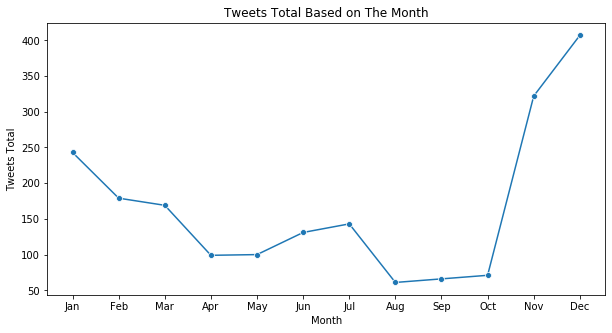

In [93]:
# plot a line plot
plt.figure(figsize = [10, 5])
sns.lineplot(x = tweets_total_based_on_month.index,  y = tweets_total_based_on_month, marker='o')
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(1, 12+1, 1), labels)
plt.title('Tweets Total Based on The Month')
plt.xlabel('Month')
plt.ylabel('Tweets Total');

A great number of tweets (407) in our dataset, were tweeted in December.

#### What is the total number of tweets for each day of the week?

In [94]:
tweets_total_based_on_day = df.groupby(df.timestamp.dt.weekday).tweet_id.count()
tweets_total_based_on_day

timestamp
0    329
1    300
2    296
3    273
4    281
5    257
6    255
Name: tweet_id, dtype: int64

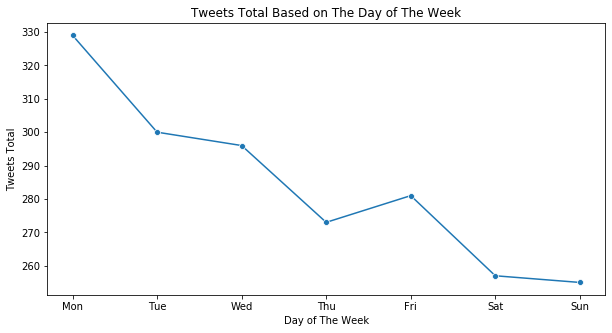

In [95]:
# plot a line plot
plt.figure(figsize = [10, 5])
sns.lineplot(x = tweets_total_based_on_day.index,  y = tweets_total_based_on_day, marker='o')
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(0, 6+1, 1),labels)
plt.title('Tweets Total Based on The Day of The Week')
plt.xlabel('Day of The Week')
plt.ylabel('Tweets Total');

A great number of tweets (329) in our dataset, were tweeted on Monday.

#### What is the total number of tweets for each hour of the day?

In [96]:
tweets_total_based_on_hour = df.groupby(df.timestamp.dt.hour).tweet_id.count()
tweets_total_based_on_hour

timestamp
0     246
1     270
2     214
3     172
4      93
5      23
6       3
13      2
14      9
15     92
16    191
17    162
18    105
19     83
20     78
21     68
22     70
23    110
Name: tweet_id, dtype: int64

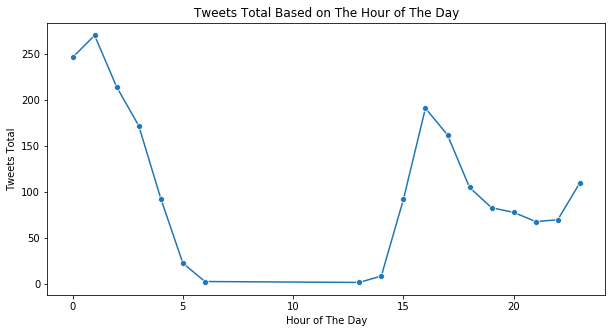

In [97]:
# plot a line plot
plt.figure(figsize = [10, 5])
sns.lineplot(x = tweets_total_based_on_hour.index,  y = tweets_total_based_on_hour, marker='o')
plt.title('Tweets Total Based on The Hour of The Day')
plt.xlabel('Hour of The Day')
plt.ylabel('Tweets Total');

A great number of tweets (730) in our dataset, were tweeted in this period (12 AM to 2 AM).

<hr>

### Retweets and Favourites. <a id='RF'></a>

#### What is the most retweeted tweet?

In [98]:
most_retweeted = df[df.retweet_count == df.retweet_count.max()]
most_retweeted

,tweet_id,timestamp,text,rating_numerator,dog_stage,retweet_count,favorite_count,breed_prediction,prediction_confidence,jpg_url
796,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,doggo,77092,155119,labrador_retriever,0.825333,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


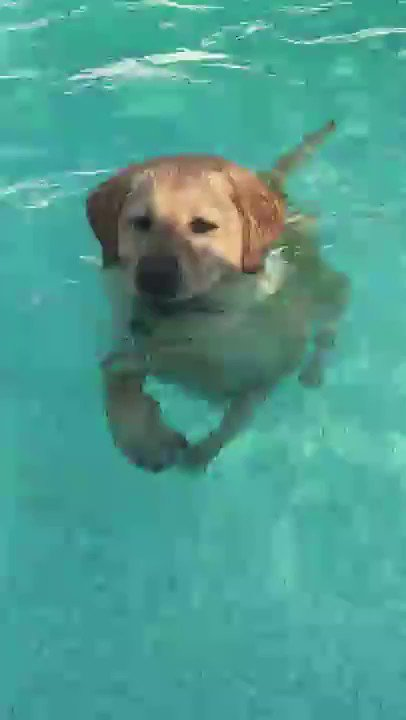

In [99]:
display(Image(most_retweeted.jpg_url.values[0], width=200))

The most retweeted tweet with (77,092 retweets) was tweeted on 2016-06-18, of a doggo predicted as  labrador_retriever.

#### What is the most favorited tweet?

In [100]:
most_favorited = df[df.favorite_count == df.favorite_count.max()]
most_favorited

,tweet_id,timestamp,text,rating_numerator,dog_stage,retweet_count,favorite_count,breed_prediction,prediction_confidence,jpg_url
796,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,doggo,77092,155119,labrador_retriever,0.825333,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


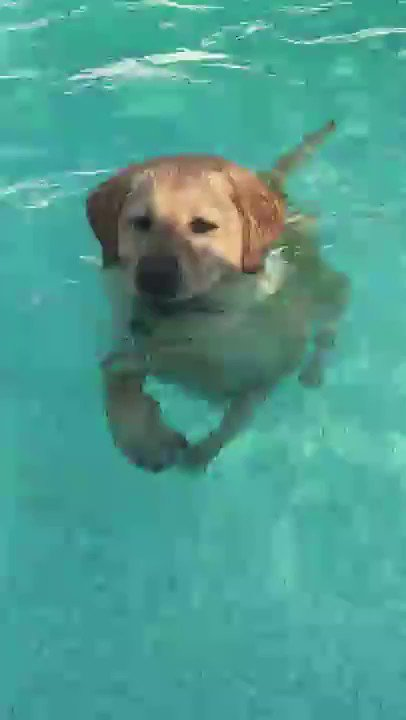

In [101]:
display(Image(most_favorited.jpg_url.values[0], width=200))

The most favorited tweet with (155,119 favorites) was tweeted on 2016-06-18, of a doggo predicted as  labrador_retriever. Which is the most retweeted tweet also.

#### What is the least retweeted tweet?

In [102]:
least_retweeted = df[df.retweet_count == df.retweet_count.min()]
least_retweeted

,tweet_id,timestamp,text,rating_numerator,dog_stage,retweet_count,favorite_count,breed_prediction,prediction_confidence,jpg_url
1977,666102155909144576,2015-11-16 03:55:04+00:00,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,11.0,NaN,11,70,english_setter,0.298617,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg


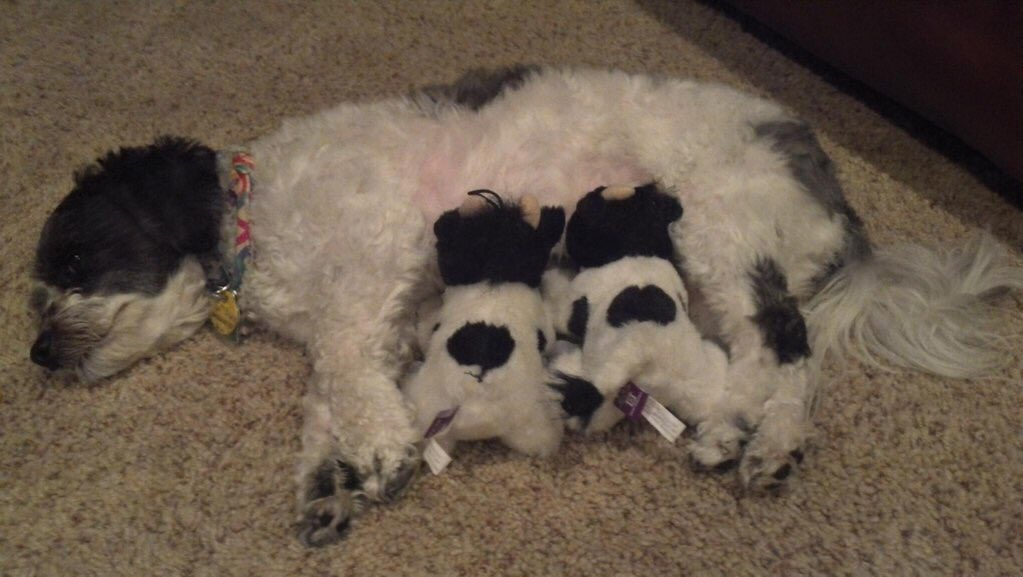

In [103]:
display(Image(least_retweeted.jpg_url.values[0], width=300))

The least retweeted tweet with (11 retweets) was tweeted on 2015-11-16, of a dog predicted as english_setter.

#### What is the least favorited tweet?

In [104]:
least_favorited = df[df.favorite_count == df.favorite_count.min()]
least_favorited

,tweet_id,timestamp,text,rating_numerator,dog_stage,retweet_count,favorite_count,breed_prediction,prediction_confidence,jpg_url
1977,666102155909144576,2015-11-16 03:55:04+00:00,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,11.0,NaN,11,70,english_setter,0.298617,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg


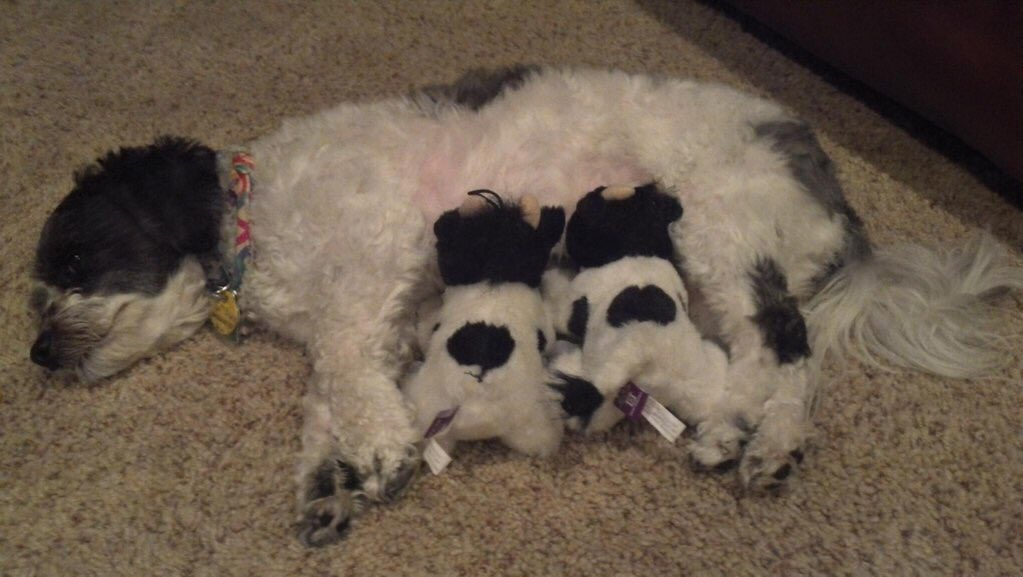

In [105]:
display(Image(least_favorited.jpg_url.values[0], width=300))

The least favorited tweet with (70 favorites) was tweeted on 2015-11-16, of a dog predicted as english_setter. Which is the least retweeted tweet also.

#### Is there a relationship between *retweet_count* and *favorite_count*?

In [106]:
# the correlation coefficient r measures the strength and direction of a linear relationship between two variables
df['retweet_count'].corr(df['favorite_count'])

0.9261596012155463

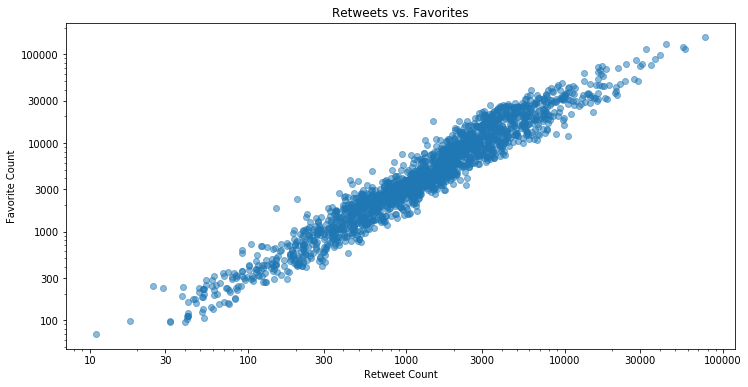

In [107]:
# plot a scatter plot with logarithmic scale transformation
plt.figure(figsize = [12, 6])
plt.scatter(data = df, x = 'retweet_count', y = 'favorite_count', alpha=.5)
plt.xscale('log')
plt.yscale('log')
xtick_locs = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(xtick_locs, xtick_locs)
ytick_locs = [100, 300, 1000, 3000, 10000, 30000, 100000]
plt.yticks(ytick_locs, ytick_locs)
plt.title('Retweets vs. Favorites')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Yes, we have a strong positive relationship between *retweet_count* and *favorite_count*. Which was expected since retweets lead to more people seeing the tweet and favoriting it.

<hr>

### Most Rated Dog Breeds. <a id='MR'></a>

#### What are the most rated dog breeds?

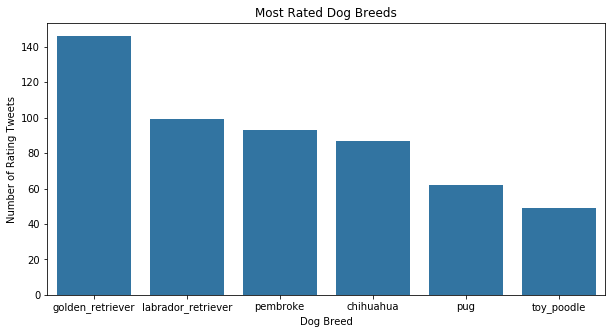

In [108]:
# plot a bar chart
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]
breeds_cat_order = df['breed_prediction'].value_counts().index[:6]
sns.countplot(data = df, x = 'breed_prediction', color = base_color, order = breeds_cat_order)
plt.title('Most Rated Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Number of Rating Tweets');

In [109]:
# a new df with only most rated breeds for further analysis 
most_rated_breeds_df = df[df.breed_prediction.isin(breeds_cat_order)]

In [110]:
# for most rated breeds, get a random image for each breed (only if prediction_confidence > 0.9)
breeds_jpg_urls = []

i = 1
for breed in breeds_cat_order:
    breed_images = most_rated_breeds_df[(most_rated_breeds_df.breed_prediction == breed) & 
                                        (most_rated_breeds_df.prediction_confidence > 0.9)].jpg_url.values
    breeds_jpg_urls.append({ 'breed': breed,
                            'jpg_url': random.choice(breed_images),
                            'number' : i
    })
    i += 1

# disply the 6 images in a table using HTML
top_breeds_table = "<table><tr>"
for breed_jpg in breeds_jpg_urls:
    top_breeds_table += "<td><div style='width: 250px; height: 250px; overflow:hidden'> \
    <img src='"+ breed_jpg['jpg_url'] +"'></div>" \
    "<center> <b>Breed: </b> " + breed_jpg['breed'] + "</center></td>"
    if breed_jpg['number'] == 3:
        top_breeds_table += "</tr><tr>"
                               
top_breeds_table += "</tr></table>"
display(HTML(top_breeds_table))

Breed: golden_retriever,Breed: labrador_retriever,Breed: pembroke
Breed: chihuahua,Breed: pug,Breed: toy_poodle


Most tweets in our dataset (according to the neural network) were about dogs from these 6 breeds.

#### What is the average rating for each breed?

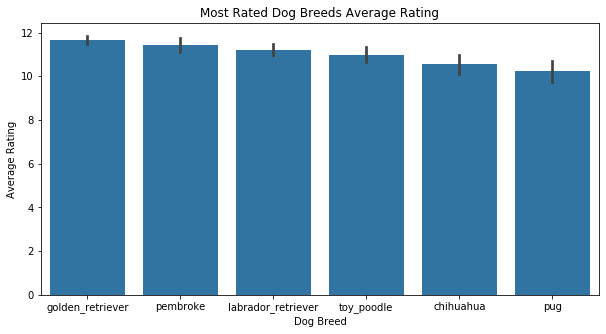

In [111]:
# plot an adapted bar chart
plt.figure(figsize = [10, 5])
cat_order = most_rated_breeds_df.groupby('breed_prediction')['rating_numerator'].mean().sort_values(
            ascending=False).index
sns.barplot(data = most_rated_breeds_df, x = 'breed_prediction', y = 'rating_numerator',
              order = cat_order, color = base_color)
plt.title('Most Rated Dog Breeds Average Rating')
plt.xlabel('Dog Breed')
plt.ylabel('Average Rating');

The average rating for these 6 breeds is close, especially (golden_retriever, pembroke, and labrador_retriever).

#### What is the average number of retweets for each breed?

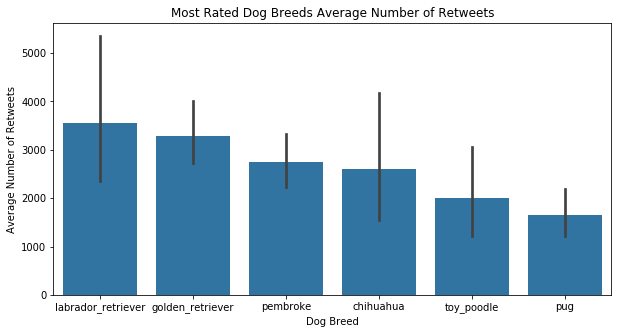

In [112]:
# plot an adapted bar chart
plt.figure(figsize = [10, 5])
cat_order = most_rated_breeds_df.groupby('breed_prediction')['retweet_count'].mean().sort_values(
            ascending=False).index
sns.barplot(data = most_rated_breeds_df, x = 'breed_prediction', y = 'retweet_count',
              order = cat_order, color = base_color)
plt.title('Most Rated Dog Breeds Average Number of Retweets')
plt.xlabel('Dog Breed')
plt.ylabel('Average Number of Retweets');

On average labrador_retriever will get more retweets than the other 5 breeds, followed by golden_retriever.

#### What is the average number of favourites for each breed?

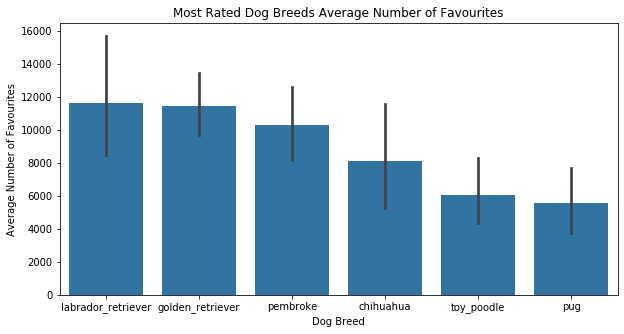

In [113]:
# plot an adapted bar chart
plt.figure(figsize = [10, 5])
cat_order = most_rated_breeds_df.groupby('breed_prediction')['favorite_count'].mean().sort_values(
            ascending=False).index
sns.barplot(data = most_rated_breeds_df, x = 'breed_prediction', y = 'favorite_count',
              order = cat_order, color = base_color)
plt.title('Most Rated Dog Breeds Average Number of Favourites')
plt.xlabel('Dog Breed')
plt.ylabel('Average Number of Favourites');

The order is the same as the (average number of retweets for each breed). Which was expected, since we found out earlier that we have a strong positive relationship between *retweet_count* and *favorite_count*.

<hr>

### References:
- <a href='https://jakevdp.github.io/WhirlwindTourOfPython/14-strings-and-regular-expressions.html'>String Manipulation and Regular Expressions.</a>
- <a href='https://www.geeksforgeeks.org/python-pandas-series-str-contains/'>Python | Pandas Series.str.contains().</a>
- <a href='https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns'>Use .corr to get the correlation between two columns.</a>
- <a href='https://stackoverflow.com/questions/47637739/how-to-display-two-local-images-side-by-side-in-jupyter'>How to display two local images side by side in jupyter?</a>
- <a href='http://blog.cacoethes.co.uk/uncategorized/cropping-an-image-in-html'>Cropping an image in HTML.</a>